### Load packages

In [179]:
using Pkg; Pkg.add("Plots")
using Plots
IJulia.clear_output(true)

0

### Make somewhat ocean like analytic profile
$ \theta(z) = Ae^{\frac{-(z+L)}{L}} - Ce^{\frac{-D(z+L)}{L}} + B + Ez$

and illustrate with plot for equally spaced points with fine spacing

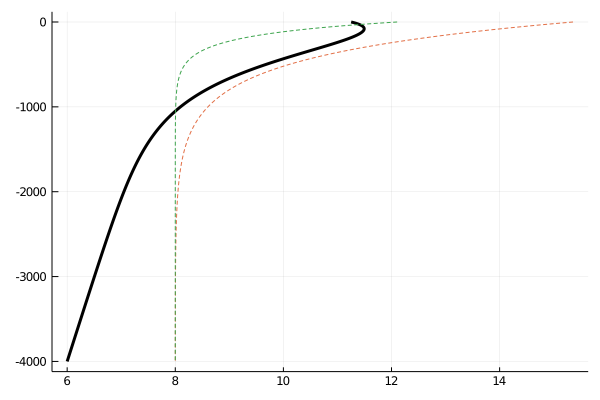

In [277]:
# Define functions and parameters
H=4000.;L=H/10.;A=20.;C=50.;D=2.5;B=8.;E=5.e-4;
ft(x,L)=exp(-x/L)
th1(z)=A*ft.(-z .+ L, L);
th2(z)=C*ft(D*(-z .+ L), L);

# Plot for equally spaced discrete points
npt=1000;
z=-collect(range(0, 1, length=npt)) .* H
phi1=th1.(z)
phi2=th2.(z)
theta=phi1 .- phi2 .+ B .+ E .* z;
plot( theta ,z,label=false, lw=3, color = :black )
plot!(phi1 .+ B ,z,label=false , line=(:dash) )
plot!(phi2 .+ B ,z,label=false , line=(:dash) )

### Now plot for profile at representative uneven spaced example 50-level ocean model vertical grid points
Use ECCO 50-level vertical grid - ( http://wwwcvs.mitgcm.org/viewvc/MITgcm/MITgcm_contrib/high_res_cube/cube92/input/data?revision=1.2&view=markup ) as example.

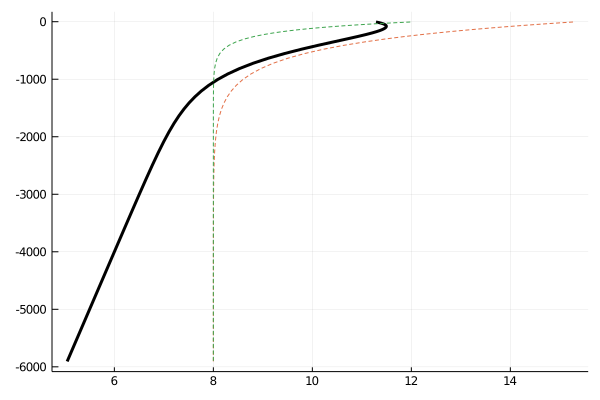

In [280]:
# Plot for ECCO 50-level discrete points
dzECCO50l=[10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.01, 
    10.03, 10.11, 10.32, 10.80, 11.76, 13.42, 16.04 , 19.82, 
    24.85,31.10, 38.42, 46.50, 55.00, 63.50, 71.58, 78.90, 
     85.15, 90.18, 93.96, 96.58, 98.25, 99.25,100.01,101.33,
    104.56,111.33,122.83,139.09,158.94,180.83,203.55,226.50,
     249.50,272.50,295.50,318.50,341.50,364.50,387.50,410.50,
    433.50,456.50];
dz=dzECCO50l;
z=-(cumsum(dz).-dz./2);
phi1=th1.(z)
phi2=th2.(z)
theta=phi1 .- phi2 .+ B .+ E .* z;
plot( theta ,z,label=false, lw=3, color = :black )
plot!(phi1 .+ B ,z,label=false , line=(:dash) )
plot!(phi2 .+ B ,z,label=false , line=(:dash) )